In [19]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [11]:
# Load data in various formats, including CSV, Excel
def load_data(file_path):
    
    # Check if data in excel file 
    if file_path.endswith("xlsx") or file_path.endswith("xls"):
        df = pd.read_excel(file_path)
    
    # Check data if in CSV file
    elif file_path.endswith("csv"):
        df = pd.read_csv(file_path)
    
    # Avoid error in file format
    else:
        raise ValueError("unsupported file")
    
    
    return df

In [12]:
# Clean data by drop null values and show types
def clean_data(data):
    
    col_types = data.dtypes
    # drop null Values 
    df = data.dropna()
    
    # Encode cateogrical data
    df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)
    
    # Encode numerical data
    scaler = StandardScaler()
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    
    return df

In [13]:
def feature_selection(data):
    correlation_matrix = data.corr()
    features = correlation_matrix[abs(correlation_matrix) > 0.5]

    return features
    

In [24]:
def visualize_data(data):
    for column in data.columns:
        # Charts for numerical columns
        if data[column].dtype in ['float64', 'int64']:
            plt.figure(figsize=(12, 4))
            
            # Histogram
            plt.subplot(1, 5, 1)
            plt.hist(data[column])
            plt.title(f'Histogram of {column}')
            plt.xlabel(column)
            plt.ylabel('Freq')

            # Scatter Plot
            plt.subplot(1, 5, 2)
            sns.scatterplot(data=data, x=column, y=data.columns[-1])
            plt.xlabel(column)
            plt.ylabel("Values")
            plt.title("scatter plot")
            plt.show()
            
            # Box Plot
            plt.subplot(1, 5, 3)
            sns.boxplot(data=data, y=column)
            plt.title(f'Box Plot of {column}')   
            plt.ylabel(column)
           
            
            # Bar Plot for categorical columns
        if data[column].dtype in ['object']: 
            plt.subplot(1, 5, 5)
            value_counts = data[column].value_counts()
            plt.bar(value_counts.index, value_counts.values)
            plt.xlabel(column)
            plt.ylabel('values')
            plt.title(f'Bar Plot of {column}')

In [17]:
file_path = input("Please enter file path")
data = load_data(file_path)


Please enter file pathInternational_Report_Departures.csv


In [21]:
data=clean_data(data)    


,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,...,carrier_ZL,carrier_ZN,carrier_ZP,carrier_ZQ,carrier_ZS,carrier_ZUQ,carrier_ZV,carrier_ZW,carrier_ZX,type_Departures
0,-0.004613,-0.407580,-0.290951,-1.364692,-0.167183,1.306639,0.252303,0.819832,-0.657174,0.965785,...,0,0,0,0,0,0,0,0,0,1
1,-0.355115,-0.407580,-0.922442,-1.509862,0.191820,0.931878,-0.102293,0.819832,-0.657174,1.569697,...,0,0,0,0,0,0,0,0,0,1
2,0.112221,-0.983740,-0.767236,-1.074354,-0.431521,-0.098717,0.721620,0.819832,-0.657174,-0.121256,...,0,0,0,0,0,0,0,0,0,1
3,-0.238281,1.608981,-0.569366,1.139476,1.441087,1.625881,0.302363,0.819832,-0.657174,-0.121256,...,0,0,0,0,0,0,0,0,0,1
4,0.345889,-0.407580,0.182392,-0.348508,-1.246778,-0.862121,2.642692,-1.219762,-0.657174,2.173609,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930803,-0.705618,0.168580,0.182392,-0.348508,0.061978,-0.914171,0.713277,0.819832,22.765196,-0.242039,...,0,0,0,0,0,0,0,0,0,1
930804,1.514231,-0.695660,0.182392,-0.348508,0.414256,-1.059911,-0.596640,-1.219762,23.045210,-0.242039,...,0,0,0,0,0,0,0,0,0,1
930805,-0.705618,0.456660,0.182392,-0.348508,0.061978,-0.914171,0.713277,0.819832,23.078153,-0.242039,...,0,0,0,0,0,0,0,0,0,1
930806,-0.238281,0.744740,-0.199004,1.139476,1.110536,-1.108492,-1.088902,-1.219762,23.407582,-0.242039,...,0,0,0,0,0,0,0,0,0,1


In [22]:
data

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,...,carrier_ZL,carrier_ZN,carrier_ZP,carrier_ZQ,carrier_ZS,carrier_ZUQ,carrier_ZV,carrier_ZW,carrier_ZX,type_Departures
0,-0.004613,-0.407580,-0.290951,-1.364692,-0.167183,1.306639,0.252303,0.819832,-0.657174,0.965785,...,0,0,0,0,0,0,0,0,0,1
1,-0.355115,-0.407580,-0.922442,-1.509862,0.191820,0.931878,-0.102293,0.819832,-0.657174,1.569697,...,0,0,0,0,0,0,0,0,0,1
2,0.112221,-0.983740,-0.767236,-1.074354,-0.431521,-0.098717,0.721620,0.819832,-0.657174,-0.121256,...,0,0,0,0,0,0,0,0,0,1
3,-0.238281,1.608981,-0.569366,1.139476,1.441087,1.625881,0.302363,0.819832,-0.657174,-0.121256,...,0,0,0,0,0,0,0,0,0,1
4,0.345889,-0.407580,0.182392,-0.348508,-1.246778,-0.862121,2.642692,-1.219762,-0.657174,2.173609,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930803,-0.705618,0.168580,0.182392,-0.348508,0.061978,-0.914171,0.713277,0.819832,22.765196,-0.242039,...,0,0,0,0,0,0,0,0,0,1
930804,1.514231,-0.695660,0.182392,-0.348508,0.414256,-1.059911,-0.596640,-1.219762,23.045210,-0.242039,...,0,0,0,0,0,0,0,0,0,1
930805,-0.705618,0.456660,0.182392,-0.348508,0.061978,-0.914171,0.713277,0.819832,23.078153,-0.242039,...,0,0,0,0,0,0,0,0,0,1
930806,-0.238281,0.744740,-0.199004,1.139476,1.110536,-1.108492,-1.088902,-1.219762,23.407582,-0.242039,...,0,0,0,0,0,0,0,0,0,1


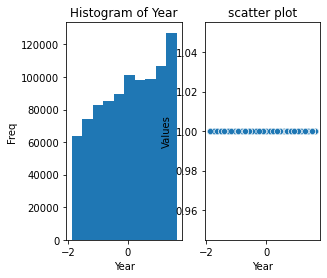

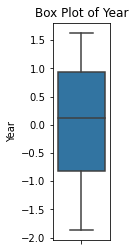

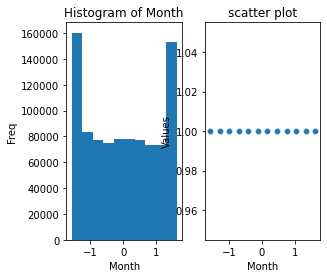

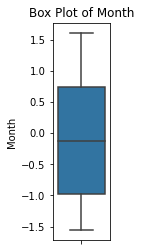

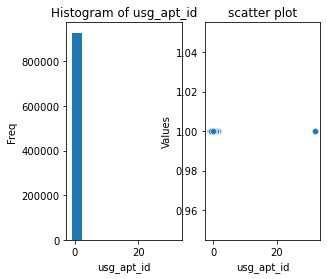

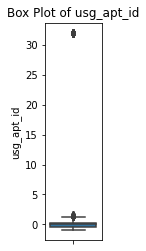

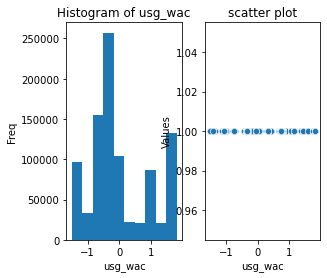

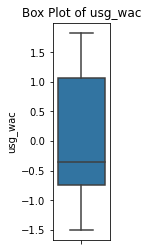

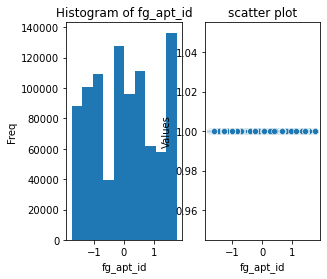

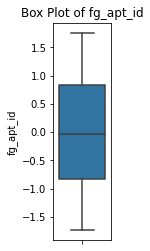

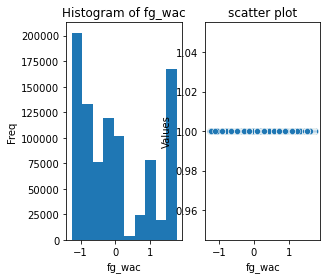

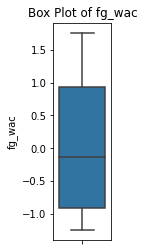

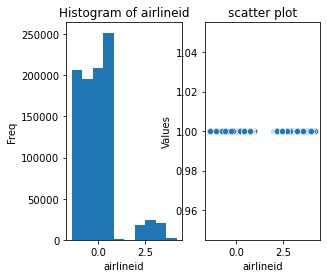

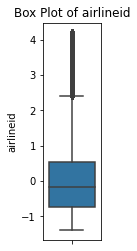

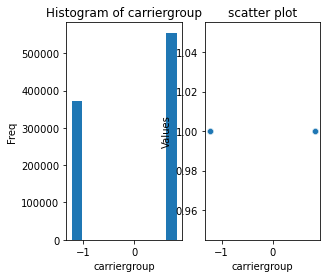

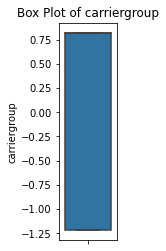

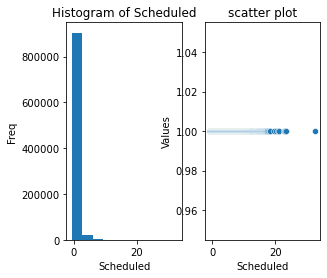

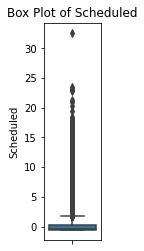

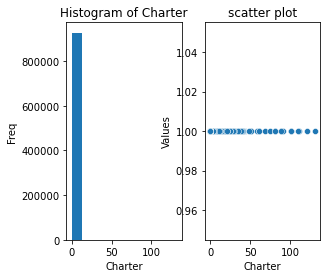

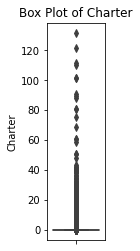

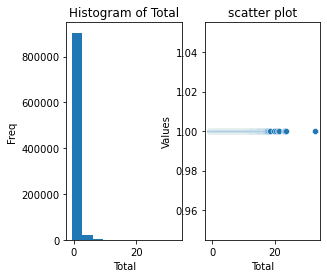

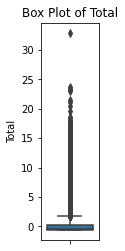

In [25]:
visualize_data(data)